
Question 1
	LDA coeffecients are as follows [[-3.48  0.33]]

Question 2
	Accuracy of predicting labels on 2020 dataset:
		using Linear Discriminant classifier is 85.0 % 
		using Quadratic Discriminant classifier is 85.0 %.

Question 3
	Confusion Matrix for 2020 stock dataset from LDA


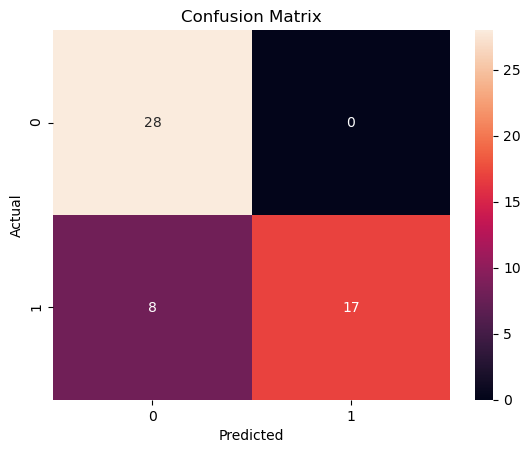


	Confusion Matrix for 2020 stock dataset from QDA


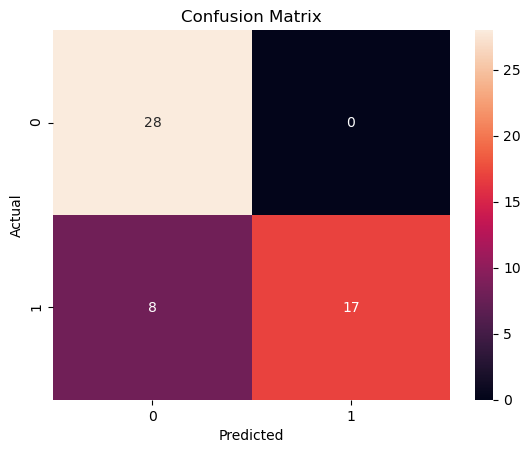


Question 4
	For LDA: TPR of 2020 dataset is 100.0 TNR of 2020 dataset is 68.0 

	For QDA: TPR of 2020 dataset is 100.0 TNR of 2020 dataset is 68.0 


Question 5
	Using predicted labels from LDA classifier, the trading strategy returns = 116.01 . Buy hold returns for the same dataset is 30.95 
. The trading strategy gave much higher returns than using buy and hold strategy

	Using predicted labels from QDA classifier, the trading strategy returns = 116.01 . Buy hold returns for the same dataset is 30.95 
. The trading strategy gave much higher returns than using buy and hold strategy


<ipython-input-1-359c79465e9e>:159: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  stock_agg2020_df = stock_agg2020_df.drop('label',1)
<ipython-input-1-359c79465e9e>:165: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  stock_agg2020_df = stock_agg2020_df.drop('label',1)


In [1]:
import os
import pandas as pd
import numpy as np
from sklearn . discriminant_analysis import LinearDiscriminantAnalysis as lda 
from sklearn . preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

##set default config
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', 12)
pd.set_option('display.expand_frame_repr', False)
pd.options.display.float_format = '{:,.2f}'.format

##set filenames
input_dir = os.getcwd()
root_dir = os.getcwd()

labels_file ='BAC_weekly_return_volatility_labels'
details_file = 'BAC_weekly_return_volatility_detailed'
labels_path_file = os.path.join(input_dir, labels_file+'.csv')
details_path_file = os.path.join(input_dir,details_file+'.csv')


try:
   labels_df = pd.read_csv(labels_path_file)
   details_df = pd.read_csv(details_path_file)
except Exception as e:
  print(e)
  print('Failed to read input files', labels_file)


## split dataframe into train and test
stock2019_df = labels_df[labels_df['Year'].isin([2019])]
stock2020_df = labels_df[labels_df['Year'].isin([2020])]

# Question 1 - Run Logistic on training 
X_train = stock2019_df[['mean_return','volatility']]
Y_train = stock2019_df[['label']]
X_test = stock2020_df[['mean_return','volatility']]
Y_test = stock2020_df[['label']]
scaler = StandardScaler ()
scaler .fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# Apply Linear Discriminant classifier to the split data frame
lda_classifier = lda()
clf = lda_classifier.fit(X_train, np.ravel(Y_train))
LD_pred = clf.predict(X_test)

# Apply Quadratic classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda_classifier = QDA ()
qd_clf=qda_classifier.fit(X_train, np.ravel(Y_train))
QD_pred = qd_clf.predict(X_test)

print('\nQuestion 1\n\tLDA coeffecients are as follows',np.round(clf.coef_,2))


# Get the accuracy and append it to the dictionary
accuracy = np.mean(LD_pred == np.ravel(Y_test))
qd_accuracy = np.mean(QD_pred == np.ravel(Y_test))

# Question 2 - print accuracy for year 2
print('\nQuestion 2\n\tAccuracy of predicting labels on 2020 dataset:\n\t\tusing Linear Discriminant classifier is', round(accuracy,2)*100,'% \n\t\tusing Quadratic Discriminant classifier is',round(qd_accuracy,2)*100,'%.')

# Question 3 - print confusion matrix
cm=confusion_matrix(np.ravel(Y_test),LD_pred)
cm = pd.DataFrame(cm)
qd_cm=confusion_matrix(np.ravel(Y_test),QD_pred)
qd_cm = pd.DataFrame(qd_cm)
print('\nQuestion 3\n\tConfusion Matrix for 2020 stock dataset from LDA')
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print('\n\tConfusion Matrix for 2020 stock dataset from QDA')
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Question 4 - calculate tpr and tnr
## for lda
tp = cm[0][0]
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]

tpr = 100*round(tp/(tp+fn),2)
tnr = 100*round(tn/(fp+tn),2)

## for QDA
qtp = qd_cm[0][0]
qtn = qd_cm[1][1]
qfp = qd_cm[0][1]
qfn = qd_cm[1][0]

qd_tpr = 100*round(qtp/(qtp+qfn),2)
qd_tnr = 100*round(qtn/(qfp+qtn),2)

print('\nQuestion 4\n\tFor LDA: TPR of 2020 dataset is',round(tpr,2),'TNR of 2020 dataset is',round(tnr,2),'\n')
print('\tFor QDA: TPR of 2020 dataset is',round(qd_tpr,2),'TNR of 2020 dataset is',round(qd_tnr,2),'\n')

# Question 5 calculate returns using predicted labels
pred_stock_df = labels_df.copy().reset_index()
pred_stock_df = details_df.merge(labels_df[['Year','Week_Number','label']], on= ['Year','Week_Number'], how = 'inner')
pred_stock_df = pred_stock_df[['Open','Adj Close','Year','Week_Number',\
            'mean_return','volatility','label']]

## copy Open and Adj Close prices from first and last day of each week
stock_agg_df = pred_stock_df.groupby(['Year','Week_Number']).agg({'Open':'first', 'Adj Close':'last', 'mean_return':'first', 'volatility':'first','label':'first'})

## calculate weekly returns
stock_agg_df['week_return'] = (stock_agg_df['Adj Close'] - stock_agg_df['Open'])/stock_agg_df['Open']

stock_agg_df = stock_agg_df.reset_index()

## split dataframe for year 2020
stock_agg2020_df = stock_agg_df[stock_agg_df['Year'].isin([2020])]

def my_returns(data):
    ## create new col for cumulative returns based on predicted labels
      new_col = 'my_return'
      #data[new_col] = '100'
      previous_day = 100.00
      ## if label = +, then return = Open/principal*(Adj Close) else its prev principal
      ## if label is - then return = prev_day
      for row in data.index:
          if data['label'][row] == '+':
             investment_return = float(previous_day)*(1+float(data['week_return'][row]))
          else:
             investment_return = float(previous_day)
          data.loc[row,new_col] = investment_return 
          previous_day = data[new_col][row]
      data[new_col] = pd.to_numeric(data[new_col],errors = 'coerce')
      return round(investment_return,2)

def buy_hold_return(data):
    ## create new data col
    new_col = 'Buy_Hold'
    ## set default 
    data[new_col] = '100'
    previous_day = 100.00
    ## for each row calculate net_return = prev_day(1+ curr_day return)
    for row in data.index:
        investment_return = float(previous_day)*(1+ float(data['week_return'][row]))
        data.loc[row,new_col] = investment_return 
        previous_day = data[new_col][row]
        data[new_col] = pd.to_numeric(data[new_col],errors = 'coerce')  
    return round(investment_return, 2)    

## attach newly predicted labels
stock_agg2020_df = stock_agg2020_df.drop('label',1)
stock_agg2020_df['label'] = LD_pred
lda_final_returns = my_returns(stock_agg2020_df)
lda_buy_hold_returns = buy_hold_return(stock_agg2020_df)


stock_agg2020_df = stock_agg2020_df.drop('label',1)
stock_agg2020_df['label'] = QD_pred
qda_final_returns = my_returns(stock_agg2020_df)
qda_buy_hold_returns = buy_hold_return(stock_agg2020_df)

print('\nQuestion 5\n\tUsing predicted labels from LDA classifier, the trading strategy returns =', lda_final_returns, '. Buy hold returns for the same dataset is', lda_buy_hold_returns,'\n. The trading strategy gave much higher returns than using buy and hold strategy' )

print('\n\tUsing predicted labels from QDA classifier, the trading strategy returns =', qda_final_returns, '. Buy hold returns for the same dataset is', qda_buy_hold_returns,'\n. The trading strategy gave much higher returns than using buy and hold strategy' )
